<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/Second/converges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fun= lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2

def g(x):
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

H = np.array([[10,12],[12,20]])

In [30]:
def linesearch(x):
    a = 0.01
    d = -1 * g(x)
    t = 0.7
    def pi(a, x):
        return fun(x) - a * t * np.matmul(np.transpose(g(x)), d)
    while pi(a, x) < fun(x - a * g(x)):
        a = 0.5 * a
    return a



def gradient(fun, g, H, x0):
  x=x0
  iter=0
  error= np.linalg.norm(g(x))
  error_history =[error]
  path=[x0]
  while error> 1e-03 and iter<1000:
    a=linesearch(x)
    x = x - a*(g(x))
    error=np.linalg.norm(g(x))
    path.append(x)
    error_history.append(error)
    iter +=1
  return x,error_history,path



In [39]:
x0=np.array([1,1]) # initial value
results (fun, g, H, x0,'M')

[error]: Invalid Method -> M
only gradinet -> G and Newton -> N present


In [25]:

def line_search(x):
    a = 1
    d = -  np.matmul(np.linalg.inv(H), g(x))
    def pi(a, x):
        return fun(x) - a * 0.8 * np.matmul(np.transpose(g(x)), d)
    while pi(a, x) < fun(x + a * d):
        a = 0.5 * a
    return a

def Newton(fun, g, H, x0):
  x=x0
  error = np.linalg.norm(g(x))
  error_history =[error]
  path=[x0]
  while error >= 1e-03:
      a = line_search(x)
  #     x = x - a * grad(x)
      x = x - a * np.matmul(np.linalg.inv(H), g(x))
      error = np.linalg.norm(g(x))
      error_history.append(error)
      path.append(x)
  return x,error_history,path 
      

In [85]:

def results (fun, g, h, x0, method):

  if (method !='N') and (method !='G') :
    return print(f'[error]: Invalid Method -> {method}\nonly G -> Gradinet and N -> Newton present')

  f, ax_conv = plt.subplots()
  ax_conv.set_yscale("log")
  ax_conv.set_ylabel('log error')
  ax_conv.set_xlabel('iteration')
  ax_conv.legend(loc="upper left")

  f_path, ax_path = plt.subplots()
  ax_path.set_ylabel('vlaue')
  ax_path.legend(['First line', 'Second line'])
  ax_path.set_xlabel('iteration')

  if (method =='G'):
    x,error_history,path=gradient(fun, g, H, x0)
    ax_conv.set_title('log-linear convergence plot using Gradient Method')
    ax_path.set_title('Path plot using Gradient Method')
  elif (method=='N'):
    x,error_history,path=Newton(fun, g, H, x0)
    ax_conv.set_title('log-linear convergence plot using Newton Method')
    ax_path.set_title('Path plot using Newton Method')

  ax_conv.plot((error_history), label='Inline label')
  ax_path.plot((path))



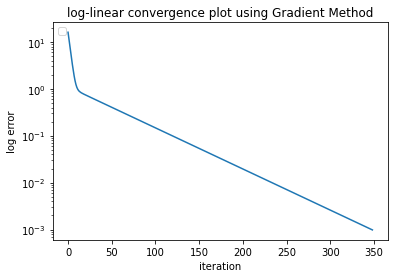

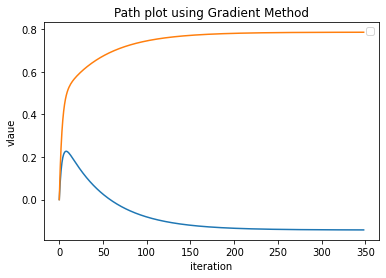

In [86]:
results(fun, g, H, np.array([0,0]),"G")

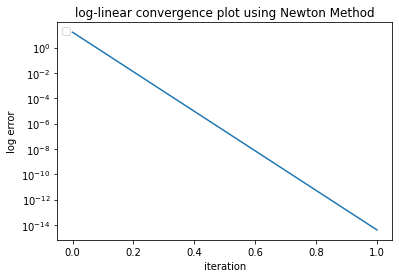

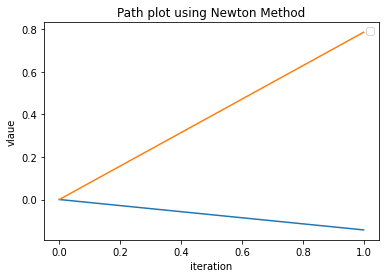

In [87]:
results(fun, g, H, np.array([0,0]),"N")
    